<a href="https://colab.research.google.com/github/bukolastella/Data-Science/blob/master/Deep%20Learning/from%20directory/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
pwd

'/content'

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [ ]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
pwd

'/content/gdrive/My Drive/kaggle'

In [ ]:
!ls flowers

daisy  dandelion  rose	sunflower  tulip


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'2.2.0'

In [ ]:
pwd

'/content/gdrive/My Drive/kaggle'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = '/content/gdrive/My Drive/kaggle/flowers'
CATEGORIES = ['daisy', 'dandelion', 'rose','sunflower','tulip']

In [ ]:
img_shape = (150,150)

train_dir = str(DATADIR)
print(train_dir)

/content/gdrive/My Drive/kaggle/flowers


In [ ]:
datagen = dict(rescale= 1./255, validation_split=0.3)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen)

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    subset='validation',
    shuffle = True,
    target_size = img_shape
)

Found 1295 images belonging to 5 classes.


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset='training',
    shuffle = True,
    target_size = img_shape
)

Found 3028 images belonging to 5 classes.


In [ ]:
train_images, train_labels = next(iter(train_generator))
train_images.shape

(32, 150, 150, 3)

In [ ]:
train_labels.shape

(32, 5)

In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key = lambda pair:pair[1])

dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Daisy' 'Dandelion' 'Rose' 'Sunflower' 'Tulip']


In [ ]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
                    Conv2D(32, 3, padding='same', kernel_regularizer= tf.keras.regularizers.l2(0.01),  activation='relu',kernel_initializer='he_uniform', input_shape = [150, 150, 3]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding='same',kernel_regularizer= tf.keras.regularizers.l2(0.01), kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same', kernel_regularizer= tf.keras.regularizers.l2(0.01),kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same',kernel_regularizer= tf.keras.regularizers.l2(0.01), kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128,kernel_regularizer= tf.keras.regularizers.l2(0.01), kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(5, activation = 'softmax'),
                    ])
 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        3

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-3), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
steps = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps = np.ceil(valid_generator.samples/valid_generator.batch_size)

history = model.fit(train_generator, epochs = 20, steps_per_epoch= steps, validation_steps= val_steps, validation_data= (valid_generator))

Epoch 1/20
95/95 [==============================] - 1392s 15s/step - loss: 5.4346 - accuracy: 0.3699 - val_loss: 3.9614 - val_accuracy: 0.5181
Epoch 2/20
95/95 [==============================] - 15s 160ms/step - loss: 3.3009 - accuracy: 0.5287 - val_loss: 2.9671 - val_accuracy: 0.5228
Epoch 3/20
95/95 [==============================] - 15s 160ms/step - loss: 2.5780 - accuracy: 0.5753 - val_loss: 2.3970 - val_accuracy: 0.5421
Epoch 4/20
95/95 [==============================] - 15s 161ms/step - loss: 2.1327 - accuracy: 0.6034 - val_loss: 2.1462 - val_accuracy: 0.5189
Epoch 5/20
95/95 [==============================] - 15s 162ms/step - loss: 1.8953 - accuracy: 0.6205 - val_loss: 1.8654 - val_accuracy: 0.5985
Epoch 6/20
95/95 [==============================] - 15s 161ms/step - loss: 1.7062 - accuracy: 0.6295 - val_loss: 1.7979 - val_accuracy: 0.5753
Epoch 7/20
95/95 [==============================] - 16s 164ms/step - loss: 1.5764 - accuracy: 0.6493 - val_loss: 1.6315 - val_accuracy: 0.6224

(0.0, 2.0)

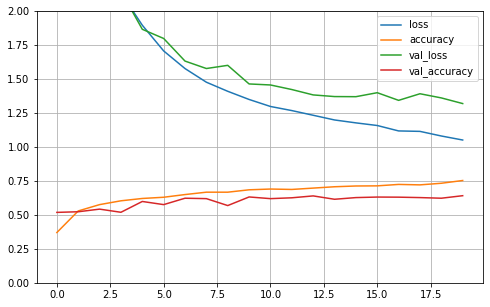

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)

**TRANSFER LEARNING**

In [ ]:
base_model = keras.applications.xception.Xception(weights = 'imagenet', include_top = False, input_shape=(150,150,3))
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = Dense(5, activation='softmax')(avg)

model = keras.Model(inputs = base_model.input, outputs = output)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer  in base_model.layers:
  layer.trainable = False

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-3), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
steps = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps = np.ceil(valid_generator.samples/valid_generator.batch_size)

history = model.fit(train_generator, epochs = 20, steps_per_epoch= steps, validation_steps= val_steps, validation_data= (valid_generator))

Epoch 1/20
95/95 [==============================] - 17s 177ms/step - loss: 0.7591 - accuracy: 0.7107 - val_loss: 0.6347 - val_accuracy: 0.7444
Epoch 2/20
95/95 [==============================] - 16s 169ms/step - loss: 0.4684 - accuracy: 0.8435 - val_loss: 0.5432 - val_accuracy: 0.7969
Epoch 3/20
95/95 [==============================] - 16s 168ms/step - loss: 0.3956 - accuracy: 0.8712 - val_loss: 0.5267 - val_accuracy: 0.7892
Epoch 4/20
95/95 [==============================] - 16s 167ms/step - loss: 0.3414 - accuracy: 0.8887 - val_loss: 0.5490 - val_accuracy: 0.7884
Epoch 5/20
95/95 [==============================] - 16s 169ms/step - loss: 0.3034 - accuracy: 0.9102 - val_loss: 0.5096 - val_accuracy: 0.8185
Epoch 6/20
95/95 [==============================] - 16s 171ms/step - loss: 0.2702 - accuracy: 0.9224 - val_loss: 0.4997 - val_accuracy: 0.8124
Epoch 7/20
95/95 [==============================] - 17s 175ms/step - loss: 0.2537 - accuracy: 0.9270 - val_loss: 0.4994 - val_accuracy: 0.8193

In [ ]:
for layer in base_model.layers:
 layer.trainable = True

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping_cb  = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
steps = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps = np.ceil(valid_generator.samples/valid_generator.batch_size)

history = model.fit(train_generator, epochs = 20, callbacks= early_stopping_cb,steps_per_epoch= steps, validation_steps= val_steps, validation_data= (valid_generator))

Epoch 1/20
95/95 [==============================] - 23s 239ms/step - loss: 0.6815 - accuracy: 0.7609 - val_loss: 0.5959 - val_accuracy: 0.7822
Epoch 2/20
95/95 [==============================] - 22s 233ms/step - loss: 0.4131 - accuracy: 0.8679 - val_loss: 0.6024 - val_accuracy: 0.7846
Epoch 3/20
95/95 [==============================] - 22s 232ms/step - loss: 0.3038 - accuracy: 0.9135 - val_loss: 0.6052 - val_accuracy: 0.8008
Epoch 4/20
95/95 [==============================] - 22s 233ms/step - loss: 0.2212 - accuracy: 0.9366 - val_loss: 0.5816 - val_accuracy: 0.8093
Epoch 5/20
95/95 [==============================] - 22s 232ms/step - loss: 0.1676 - accuracy: 0.9574 - val_loss: 0.6115 - val_accuracy: 0.8031
Epoch 6/20
95/95 [==============================] - 22s 232ms/step - loss: 0.1333 - accuracy: 0.9686 - val_loss: 0.5717 - val_accuracy: 0.8116
Epoch 7/20
95/95 [==============================] - 22s 232ms/step - loss: 0.1046 - accuracy: 0.9785 - val_loss: 0.5775 - val_accuracy: 0.8054

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
conv_base.trainable = False

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs = 20, steps_per_epoch= steps, validation_steps= val_steps, validation_data= (valid_generator))

Epoch 1/20
95/95 [==============================] - 17s 176ms/step - loss: 1.4724 - accuracy: 0.4085 - val_loss: 1.2111 - val_accuracy: 0.4927
Epoch 2/20
95/95 [==============================] - 15s 154ms/step - loss: 1.1483 - accuracy: 0.6087 - val_loss: 1.0538 - val_accuracy: 0.6015
Epoch 3/20
95/95 [==============================] - 15s 157ms/step - loss: 0.9736 - accuracy: 0.6859 - val_loss: 1.0659 - val_accuracy: 0.6286
Epoch 4/20
95/95 [==============================] - 15s 155ms/step - loss: 0.8592 - accuracy: 0.7322 - val_loss: 0.7732 - val_accuracy: 0.6641
Epoch 5/20
95/95 [==============================] - 15s 156ms/step - loss: 0.7776 - accuracy: 0.7576 - val_loss: 1.0612 - val_accuracy: 0.6903
Epoch 6/20
95/95 [==============================] - 15s 156ms/step - loss: 0.7173 - accuracy: 0.7784 - val_loss: 0.8950 - val_accuracy: 0.6888
Epoch 7/20
95/95 [==============================] - 15s 156ms/step - loss: 0.6698 - accuracy: 0.7949 - val_loss: 0.9988 - val_accuracy: 0.7205

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-5), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping_cb  = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(train_generator, epochs = 100,steps_per_epoch= steps, callbacks = [early_stopping_cb], validation_steps= val_steps, validation_data= (valid_generator))

Epoch 1/100
95/95 [==============================] - 16s 172ms/step - loss: 0.3170 - accuracy: 0.8993 - val_loss: 0.8844 - val_accuracy: 0.7761
Epoch 2/100
95/95 [==============================] - 15s 158ms/step - loss: 0.1887 - accuracy: 0.9472 - val_loss: 0.0346 - val_accuracy: 0.7931
Epoch 3/100
95/95 [==============================] - 15s 159ms/step - loss: 0.1189 - accuracy: 0.9756 - val_loss: 0.6238 - val_accuracy: 0.8008
Epoch 4/100
95/95 [==============================] - 15s 160ms/step - loss: 0.0743 - accuracy: 0.9894 - val_loss: 0.9402 - val_accuracy: 0.7946
Epoch 5/100
95/95 [==============================] - 15s 158ms/step - loss: 0.0428 - accuracy: 0.9970 - val_loss: 0.4734 - val_accuracy: 0.7969
Epoch 6/100
95/95 [==============================] - 15s 157ms/step - loss: 0.0284 - accuracy: 0.9993 - val_loss: 0.4832 - val_accuracy: 0.8108
Epoch 7/100
95/95 [==============================] - 15s 159ms/step - loss: 0.0180 - accuracy: 0.9993 - val_loss: 0.1132 - val_accuracy:

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block4_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-10), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping_cb  = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(train_generator, epochs = 100,steps_per_epoch= steps, callbacks = [early_stopping_cb], validation_steps= val_steps, validation_data= (valid_generator))

Epoch 1/100
95/95 [==============================] - 17s 178ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9358 - val_accuracy: 0.8131
Epoch 2/100
95/95 [==============================] - 15s 162ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.8131
Epoch 3/100
95/95 [==============================] - 15s 162ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.5028 - val_accuracy: 0.8131
Epoch 4/100
95/95 [==============================] - 15s 162ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2919 - val_accuracy: 0.8131
Epoch 5/100
95/95 [==============================] - 15s 162ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8735 - val_accuracy: 0.8131
Epoch 6/100
95/95 [==============================] - 16s 163ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1387 - val_accuracy: 0.8131
Epoch 7/100
95/95 [==============================] - 15s 162ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.0792 - val_accuracy: